# Telcom Customer Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import seaborn as sns

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import cross_validation, metrics 
from sklearn.grid_search import GridSearchCV   #Perforing grid search


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
#density plot of churn column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:

df = df.drop(columns = ['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:

#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#One hot encoding all the columns with values Yes No.

from sklearn.preprocessing import LabelEncoder
encoded_df = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


(array([5174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

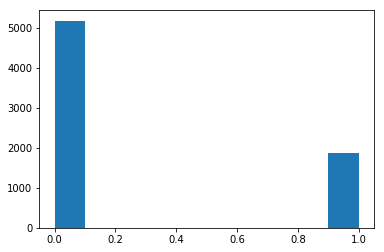

In [11]:
plt.hist(encoded_df['Churn'] )

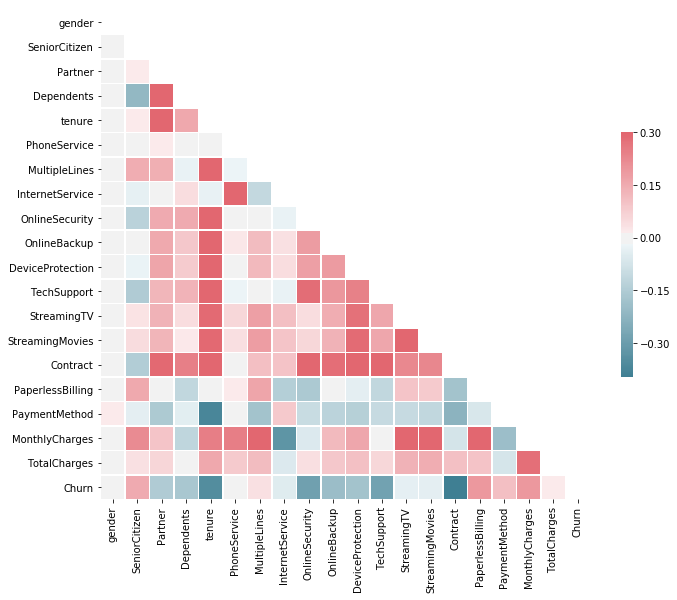

In [12]:
# Correlation matrix
corr = encoded_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
encoded_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
features = encoded_df [['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]
label = encoded_df['Churn']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=7)


# TRAIN THE MODEL

lets define a function which will help us create XGBoost models and perform cross-validation. The best part is that you can take this function as it is and use it later for your own models.

In [16]:

#function to train and cross validate the model


def modelfit(alg,features_train,label_train):
    
    X_train, X_test, y_train, y_test = train_test_split(features_train, label_train, test_size=0.33, random_state=7)
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Predict Test set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1]
        
    #Print model report:
    print ("Model Report")
    #print ("Training set Accuracy : %.4g" % alg.score(y_train.values, dtrain_predictions))
    print ("Training set Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions))
    #print ("Test set Accuracy : %.4g" % alg.score(y_test.values, dtest_predictions))
    print ("Test set Accuracy : %.4g" % metrics.accuracy_score(y_test.values, dtest_predictions))
    print ("Training set AUC Score (Train) : %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    print ("AUC Score (Test) : %f" % metrics.roc_auc_score(y_test, dtest_predprob))               
                                                               
    #the feat imp result will be in np array, convert it to Series so we can plot it later
    feat_imp = pd.Series(alg.feature_importances_)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model Report
Training set Accuracy : 0.9947
Test set Accuracy : 0.7742
Training set AUC Score (Train) : 0.999753
AUC Score (Test) : 0.815298


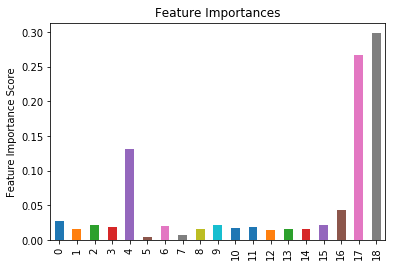

In [17]:
#Choose all predictors except target & IDcols
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, features, label)

# Hyperparameter Optimization

We will be tweaking parameters to increase the accuracy  

- Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.  
- Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.  
- Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.  
- Lower the learning rate and decide the optimal parameters  

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model Report
Training set Accuracy : 0.9947
Test set Accuracy : 0.7742
Training set AUC Score (Train) : 0.999753
AUC Score (Test) : 0.815298


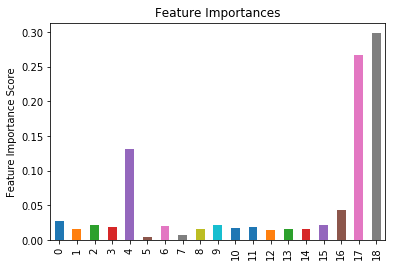

In [23]:
#Base Model

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, features, label)


# Grid Search
The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter.

## Tune max_depth and min_child_weight

In [19]:
#parameters are passed as a Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6] }
gsearch2 = GridSearchCV(estimator = xgb2, 
     param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


([mean: 0.80841, std: 0.01420, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.80984, std: 0.01439, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.81070, std: 0.01637, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.80433, std: 0.01381, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.80405, std: 0.01368, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.80633, std: 0.01592, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.80104, std: 0.01306, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.80200, std: 0.01312, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.80198, std: 0.01368, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 4, 'min_child_weight': 6},
 0.8107002841465972)

The best values are max_depth': 4, 'min_child_weight': 6


## Tune Gamma 

In [20]:
#Update the estimator using the parameters already tunes before that is, max_Depth and min_child_weight

xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

#parameters are passed as a Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
param_test3 = {
 'gamma':[0.1,0.2,0.3,0.4,0.5] }
gsearch3 = GridSearchCV(estimator = xgb3, 
     param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_



([mean: 0.80991, std: 0.01594, params: {'gamma': 0.1},
  mean: 0.81057, std: 0.01453, params: {'gamma': 0.2},
  mean: 0.81036, std: 0.01574, params: {'gamma': 0.3},
  mean: 0.81020, std: 0.01418, params: {'gamma': 0.4},
  mean: 0.80938, std: 0.01446, params: {'gamma': 0.5}],
 {'gamma': 0.2},
 0.8105703230993166)

## Tune Learning Rate 

In [21]:
#Update the estimator using the parameters already tunes before that is, gamma

xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
param_test4 = {
 'learning_rate':[0.1,0.2,0.3,0.4,0.5] }
gsearch4 = GridSearchCV(estimator = xgb4, 
     param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_




([mean: 0.81057, std: 0.01453, params: {'learning_rate': 0.1},
  mean: 0.80045, std: 0.01337, params: {'learning_rate': 0.2},
  mean: 0.79041, std: 0.01213, params: {'learning_rate': 0.3},
  mean: 0.78771, std: 0.01181, params: {'learning_rate': 0.4},
  mean: 0.78089, std: 0.01431, params: {'learning_rate': 0.5}],
 {'learning_rate': 0.1},
 0.8105703230993166)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model Report
Training set Accuracy : 0.9349
Test set Accuracy : 0.7845
Training set AUC Score (Train) : 0.981693
AUC Score (Test) : 0.823914


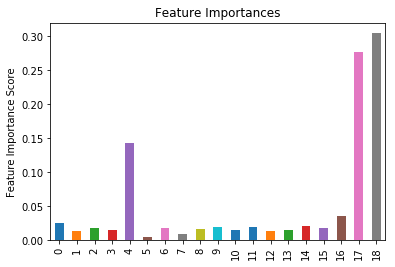

In [22]:
#Re- train the model with tweaked paramters 
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb5, features, label)

Test Acuracy increased to 78.45%